# EDA ON E-COMMERCE

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns

In [6]:
#read csv file
data = pd.read_csv(r'C:\Users\talar\OneDrive\Desktop\AICW\project\ecommerce_sales_data.csv')
data.head()

,Order Date,Product Name,Category,Region,Quantity,Sales,Profit
0,2024-12-31,Printer,Office,North,4,3640,348.93
1,2022-11-27,Mouse,Accessories,East,7,1197,106.53
2,2022-05-11,Tablet,Electronics,South,5,5865,502.73
3,2024-03-16,Mouse,Accessories,South,2,786,202.87
4,2022-09-10,Mouse,Accessories,West,1,509,103.28


In [7]:
data.columns

Index(['Order Date', 'Product Name', 'Category', 'Region', 'Quantity', 'Sales',
       'Profit'],
      dtype='object')

In [8]:
data.shape

(3500, 7)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3500 entries, 0 to 3499
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Order Date    3500 non-null   object 
 1   Product Name  3500 non-null   object 
 2   Category      3500 non-null   object 
 3   Region        3500 non-null   object 
 4   Quantity      3500 non-null   int64  
 5   Sales         3500 non-null   int64  
 6   Profit        3500 non-null   float64
dtypes: float64(1), int64(2), object(4)
memory usage: 191.5+ KB


In [11]:
data.isnull().sum()

Order Date      0
Product Name    0
Category        0
Region          0
Quantity        0
Sales           0
Profit          0
dtype: int64

In [12]:
data.describe()

,Quantity,Sales,Profit
count,3500.000000,3500.000000,3500.000000
mean,4.931714,3047.966000,527.047203
std,2.575895,2440.213237,504.139732
min,1.000000,51.000000,6.970000
25%,3.000000,1049.500000,158.695000
50%,5.000000,2350.500000,361.070000
75%,7.000000,4537.000000,729.125000
max,9.000000,10782.000000,2946.930000


In [13]:
#drop duplicates
data.drop_duplicates(inplace=True)
data.shape

(3500, 7)

In [21]:
#convert quantity and sales into numercial values
data['Profit'] = pd.to_numeric(data['Profit'], errors='coerce')
data['Sales'] = pd.to_numeric(data['Sales'], errors='coerce')
data.head()

,Order Date,Product Name,Category,Region,Quantity,Sales,Profit
0,2024-12-31,Printer,Office,North,4,3640,348.93
1,2022-11-27,Mouse,Accessories,East,7,1197,106.53
2,2022-05-11,Tablet,Electronics,South,5,5865,502.73
3,2024-03-16,Mouse,Accessories,South,2,786,202.87
4,2022-09-10,Mouse,Accessories,West,1,509,103.28


In [23]:
#replace object features null with none
data['Order Date'] = data['Order Date'].replace(np.nan, 'NONE')
data['Product Name'] = data['Product Name'].replace(np.nan, 'NONE')
data['Category'] = data['Category'].replace(np.nan, 'NONE')
data['Region'] = data['Region'].replace(np.nan, 'NONE')
data['Quantity'] = data['Quantity'].replace(np.nan, 'NONE')
data['Sales'] = data['Sales'].replace(np.nan, 'NONE')
data['Profit'] = data['Profit'].replace(np.nan, 'NONE')
data.isnull().sum()

Order Date      0
Product Name    0
Category        0
Region          0
Quantity        0
Sales           0
Profit          0
dtype: int64

In [25]:
data['Sales'] = data['Sales'].replace(np.nan,0)
data.head()

,Order Date,Product Name,Category,Region,Quantity,Sales,Profit
0,2024-12-31,Printer,Office,North,4,3640,348.93
1,2022-11-27,Mouse,Accessories,East,7,1197,106.53
2,2022-05-11,Tablet,Electronics,South,5,5865,502.73
3,2024-03-16,Mouse,Accessories,South,2,786,202.87
4,2022-09-10,Mouse,Accessories,West,1,509,103.28


# Data Visualization On E-Commerce

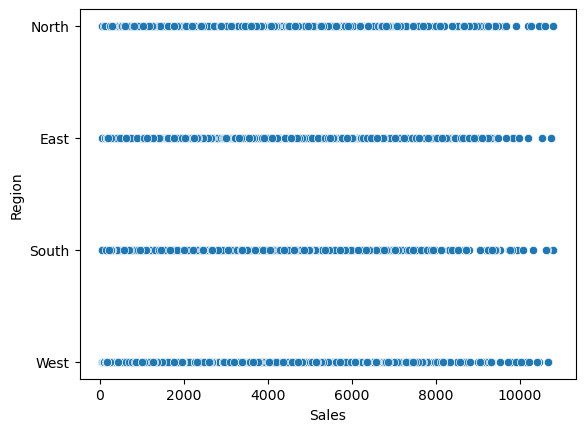

In [28]:
sns.scatterplot(x=data['Sales'], y=data['Region'])
plt.show()

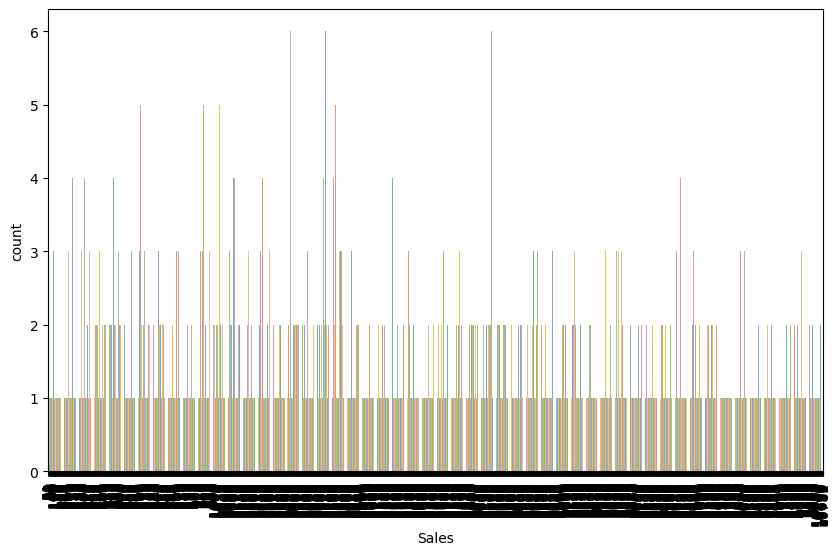

In [30]:
plt.figure(figsize=(10,6))
sns.countplot(x="Sales",data=data,palette="Set2")
plt.xticks(rotation=90)
plt.show()

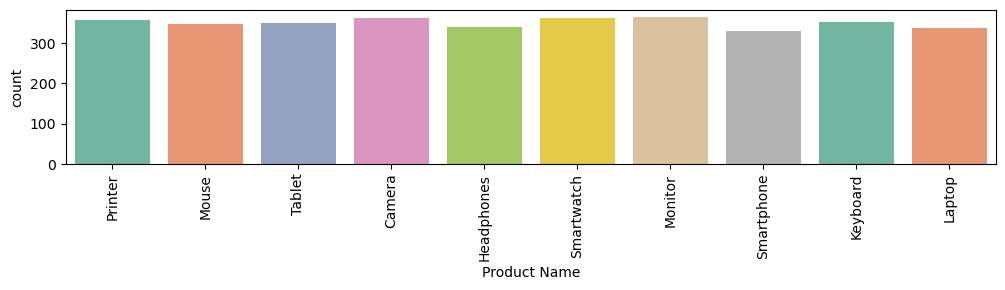

In [31]:
plt.figure(figsize=(12,2))
sns.countplot(x='Product Name',data=data,palette="Set2")
plt.xticks(rotation=90)
plt.show()

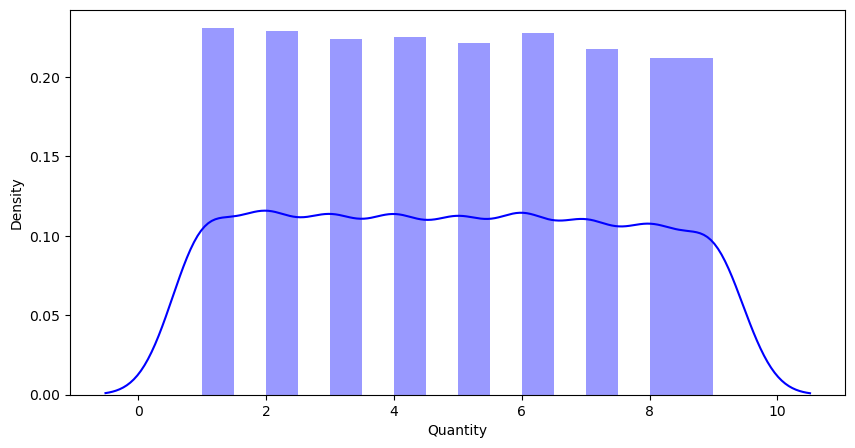

In [32]:
# dist plot on quantity frequency
plt.figure(figsize=(10,5))
sns.distplot(data['Quantity'],color='b')
plt.show()

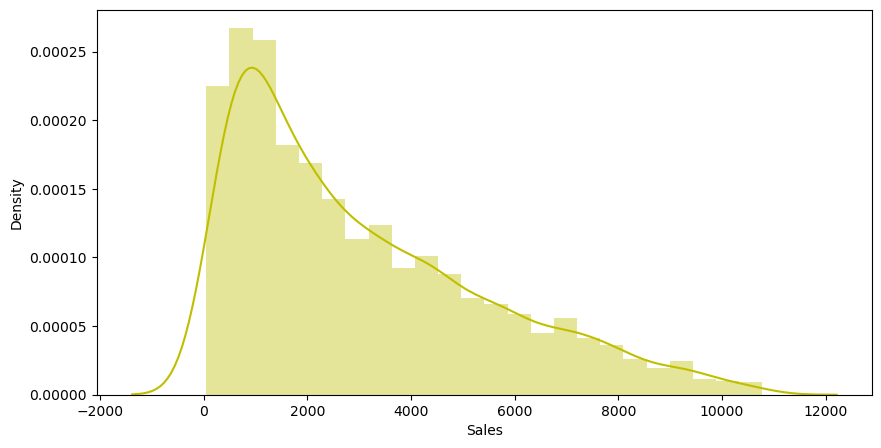

In [33]:
# dist plot on sales
plt.figure(figsize=(10,5))
sns.distplot(data['Sales'],color='y')
plt.show()

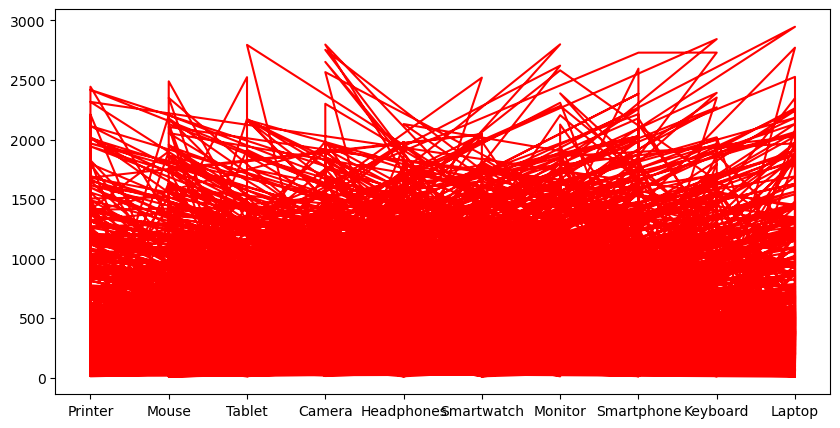

In [37]:
# line plot
plt.figure(figsize=(10,5))
plt.plot(data['Product Name'], data['Profit'], color='r')
plt.show()

In [38]:
num_fea = ['Category','Region','Quantity' ,'Sales']
num_data = data[num_fea]
num_data.head()

,Category,Region,Quantity,Sales
0,Office,North,4,3640
1,Accessories,East,7,1197
2,Electronics,South,5,5865
3,Accessories,South,2,786
4,Accessories,West,1,509


In [39]:
# select top 10 based on quantity
top_10 = data.sort_values('Quantity',ascending=False).head(10)
top_10

,Order Date,Product Name,Category,Region,Quantity,Sales,Profit
3461,2023-03-15,Printer,Office,West,9,1764,322.11
8,2022-04-02,Smartwatch,Electronics,East,9,5526,595.28
1926,2022-02-13,Headphones,Accessories,East,9,4914,1160.45
752,2022-05-29,Monitor,Accessories,North,9,6471,1844.59
750,2023-03-10,Headphones,Accessories,West,9,1899,501.40
1901,2024-09-05,Camera,Electronics,West,9,3177,629.96
1968,2022-12-10,Printer,Office,South,9,7029,1005.58
1967,2023-12-07,Smartphone,Electronics,West,9,10404,2028.21
1950,2024-10-13,Keyboard,Accessories,North,9,9900,576.80
1229,2023-10-23,Camera,Electronics,South,9,3780,724.36


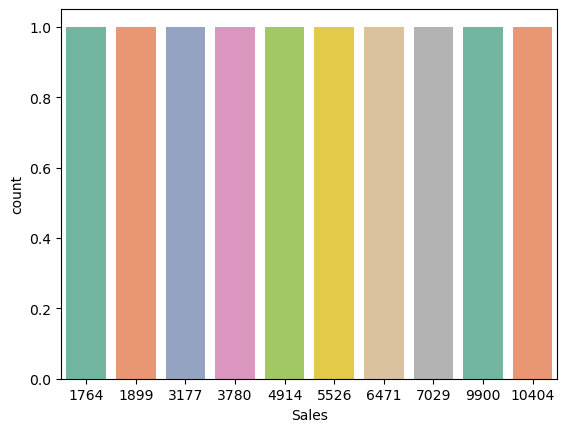

In [40]:
sns.countplot(x='Sales',data=top_10,palette="Set2")
plt.show()

In [41]:
top_10.loc[top_10.Category=='Sales']['Profit']

Series([], Name: Profit, dtype: float64)